### Codio Activity 14.5:  Preventing Overfitting by Limiting Growth

This activity focuses on using the hyperparameters in the scikit-learn model that restrict the depth of the tree.  You will compare different setting combinations of these hyperparameters to determine the best parameters using a test set for evaluating your classifier.  

#### Index

- [Problem 1](#-Problem-1)
- [Problem 2](#-Problem-2)
- [Problem 3](#-Problem-3)
- [Problem 4](#-Problem-4)
- [Problem 5](#-Problem-5)

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.tree import DecisionTreeClassifier, export_text, plot_tree
from sklearn.model_selection import train_test_split, GridSearchCV

### The Data

For this exercise, you will use the credit card default dataset.  Again, the goal is to predict credit card default.  Below, the data is loaded, cleaned, and split for you.

In [7]:
default = pd.read_csv('codio_14_2_solution/data/Default.csv', skiprows = 1)
default.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [8]:
default = default.rename({'default payment next month': 'default'}, axis = 1)

In [9]:
default.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   ID         30000 non-null  int64
 1   LIMIT_BAL  30000 non-null  int64
 2   SEX        30000 non-null  int64
 3   EDUCATION  30000 non-null  int64
 4   MARRIAGE   30000 non-null  int64
 5   AGE        30000 non-null  int64
 6   PAY_0      30000 non-null  int64
 7   PAY_2      30000 non-null  int64
 8   PAY_3      30000 non-null  int64
 9   PAY_4      30000 non-null  int64
 10  PAY_5      30000 non-null  int64
 11  PAY_6      30000 non-null  int64
 12  BILL_AMT1  30000 non-null  int64
 13  BILL_AMT2  30000 non-null  int64
 14  BILL_AMT3  30000 non-null  int64
 15  BILL_AMT4  30000 non-null  int64
 16  BILL_AMT5  30000 non-null  int64
 17  BILL_AMT6  30000 non-null  int64
 18  PAY_AMT1   30000 non-null  int64
 19  PAY_AMT2   30000 non-null  int64
 20  PAY_AMT3   30000 non-null  int64
 21  PAY_AMT4   3

In [10]:
X_train, X_test, y_train, y_test = train_test_split(default.drop('default', axis = 1), default.default, 
                                                   random_state = 42)

### Problem 1

#### Unlimited Growth

Use the default settings for the `DecisionTreeClassifier` to fit the estimator on the training data and compare the training and test set accuracy score.  Assign the estimator as `dtree`, training score as floats to `train_acc` and `test_acc` respectively.  Examine the depth of the tree with the `.get_depth()` method.  Assign this to `depth_1`.  

<div class="alert alert-block alert-info"><b>Note: </b> Use <code>random_state = 42</code> for all estimators in this assignment!</div>

In [12]:
dtree = DecisionTreeClassifier(random_state = 42).fit(X_train,y_train)
dtree

DecisionTreeClassifier(random_state=42)

In [13]:
depth_1 = dtree.get_depth()
depth_1

41

In [14]:
train_acc = dtree.score(X_train, y_train)
test_acc = dtree.score(X_test, y_test)

In [15]:
print(f'Training Accuracy: {train_acc: .2f}')
print(f'Trest Accuracy: {test_acc: .2f}')
print(f'Depth of tree: {depth_1}')

Training Accuracy:  1.00
Trest Accuracy:  0.73
Depth of tree: 41


### Problem 2

### `min_samples_split`

Setting the `min_samples_split` argument will control splitting nodes with either a number of samples or percent of the data as valued.  From the estimators docstring:

```
min_samples_split : int or float, default=2
    The minimum number of samples required to split an internal node:

    - If int, then consider `min_samples_split` as the minimum number.
    - If float, then `min_samples_split` is a fraction and
      `ceil(min_samples_split * n_samples)` are the minimum
      number of samples for each split.
```

Use this to limit the trees growth to nodes with more than 5% of the samples.  Assign the estimator to `dtree_samples`, and train and test accuracy as floats to `samples_train_acc` and `samples_test_acc` respectively.  Assign the depth of the tree to `depth_2` below.  Remember to set `random_state = 42` in your estimator.


In [16]:
dtree_samples = DecisionTreeClassifier(min_samples_split = 0.05, random_state = 42).fit(X_train, y_train)
dtree_samples

DecisionTreeClassifier(min_samples_split=0.05, random_state=42)

In [17]:
depth_2 = dtree_samples.get_depth()
depth_2

24

In [18]:
samples_train_acc = dtree_samples.score(X_train, y_train)
samples_test_acc = dtree_samples.score(X_test, y_test)

In [19]:
print(f'Training Accuracy: {samples_train_acc: .2f}')
print(f'Trest Accuracy: {samples_test_acc: .2f}')
print(f'Depth of tree: {depth_2}')

Training Accuracy:  0.82
Trest Accuracy:  0.82
Depth of tree: 24


### Problem 3

#### `max_depth`

Below, create a tree that grows to a maximum depth of 5.  Assign the estimator as `depth_tree` and the accuracy on the train and test set as floats to `depth_train_acc` and `depth_test_acc` respectively.  Be sure to set `random_state = 42`. 

In [21]:
depth_tree = DecisionTreeClassifier(min_samples_split = 5, random_state = 42).fit(X_train, y_train)
depth_tree

DecisionTreeClassifier(min_samples_split=5, random_state=42)

In [22]:
depth_train_acc = depth_tree.score(X_train, y_train)
depth_test_acc = depth_tree.score(X_test, y_test)

In [23]:
print(f'Training Accuracy: {depth_train_acc: .2f}')
print(f'Trest Accuracy: {depth_test_acc: .2f}')

Training Accuracy:  0.98
Trest Accuracy:  0.73


### Problem 4

### `min_impurity_decrease`

**10 Points**

This stops splitting when there is less than a given amount of impurity decrease.  Below, use a decision tree called `imp_tree` with a `min_impurity_decrease = 0.01`, examine its depth as `depth_4` and the train and test scores as floats to `imp_training_acc` and `imp_test_acc` respectively.  Set `random_state = 42` in your estimator.

In [24]:
imp_tree = DecisionTreeClassifier(random_state = 42, min_impurity_decrease = 0.01).fit(X_train, y_train)
imp_tree

DecisionTreeClassifier(min_impurity_decrease=0.01, random_state=42)

In [25]:
depth_4 = imp_tree.get_depth()
depth_4

2

In [27]:
imp_train_acc = imp_tree.score(X_train, y_train)
imp_test_acc = imp_tree.score(X_test, y_test)

In [28]:
print(f'Training Accuracy: {imp_train_acc: .2f}')
print(f'Trest Accuracy: {imp_test_acc: .2f}')
print(f'Depth of tree: {depth_4}')

Training Accuracy:  0.82
Trest Accuracy:  0.82
Depth of tree: 2


### Problem 5

###  Grid Searching parameters

Finally, consider the parameters for each of the growth preventing parameters and use a grid search with a decision tree.  Assign the best parameters as `best_growth_parameters` below and the train and test score as `grid_train_acc` and `grid_test_acc`.  Be sure to set `random_state = 42`. 

In [29]:
params = {'min_impurity_decrease': [0.01, 0.02, 0.03, 0.05],
         'max_depth': [2, 5, 10],
         'min_samples_split': [0.1, 0.2, 0.05]}

In [30]:
grid = GridSearchCV(DecisionTreeClassifier(random_state = 42), param_grid = params).fit(X_train, y_train)
grid

GridSearchCV(estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'max_depth': [2, 5, 10],
                         'min_impurity_decrease': [0.01, 0.02, 0.03, 0.05],
                         'min_samples_split': [0.1, 0.2, 0.05]})

In [31]:
grid_train_acc = grid.score(X_train, y_train)
grid_test_acc = grid.score(X_test, y_test)
best_params = grid.best_params_

In [32]:
print(f'Training Accuracy: {grid_train_acc: .2f}')
print(f'Trest Accuracy: {grid_test_acc: .2f}')
print(f'Best parameters of tree: {best_params}')

Training Accuracy:  0.82
Trest Accuracy:  0.82
Best parameters of tree: {'max_depth': 2, 'min_impurity_decrease': 0.01, 'min_samples_split': 0.1}


Note how long the basic grid search takes.  You likely don't want to try to be too exhaustive with the parameters due to the time for training cost. 

### Codio Activity 14.6:  Pruning a Tree after Fitting

This activity focuses on using pruning to avoid overfitting in the decision tree.  By default, scikit-learn offers a `cost_complexity_pruning_path` that helps decide what the optimal `ccp_alpha` hyperparameter.  In what follows, you will learn how you can use the cost complexity paths to optimize the `ccp_alpha` hyperparameter in your `DecisionTreeClassifier`.  

#### Index

- [Problem 1](#-Problem-1)
- [Problem 2](#-Problem-2)
- [Problem 3](#-Problem-3)
- [Problem 4](#-Problem-4)
- [Problem 5](#-Problem-5)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.tree import DecisionTreeClassifier, export_text, plot_tree
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.compose import make_column_selector, make_column_transformer
from sklearn.pipeline import Pipeline

### The Data

For this exercise, you will use the iris data from the videos.  Again, the goal is to predict the species of flower using measurements of the plant.  Below, the data is loaded, cleaned, and split for you.

In [2]:
iris = sns.load_dataset('iris')
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [3]:
X = iris.drop('species', axis = 1)
y = iris.species

In [4]:
X_train,X_test, y_train, y_test = train_test_split(X, y, random_state = 22)

In [5]:
X_train.head()

,sepal_length,sepal_width,petal_length,petal_width
139,6.9,3.1,5.4,2.1
108,6.7,2.5,5.8,1.8
50,7.0,3.2,4.7,1.4
56,6.3,3.3,4.7,1.6
16,5.4,3.9,1.3,0.4


### Problem 1

#### Extracting the path

Below, fit a `DecisionTreeClassifier` on the training data with all default parameters and `random_state = 42`.  The fit estimator will have a `.cost_complexity_pruning_path()` method that you can pass the training data to.  Assign the results to the variable `path` below.

In [7]:
dtree = DecisionTreeClassifier(random_state=42).fit(X_train, y_train)
path = dtree.cost_complexity_pruning_path(X_train, y_train)
path

{'ccp_alphas': array([0.        , 0.00868056, 0.01190476, 0.01733193, 0.02018468,
        0.25904922, 0.34046294]),
 'impurities': array([0.        , 0.01736111, 0.02926587, 0.04659781, 0.06678248,
        0.3258317 , 0.66629464])}

### Problem 2

#### The `ccp_alphas` and `impurities`

Your `path` variable now contains a collection of `ccp_alpha` values that control the pruning and the associated impurities for each prune.  Assign the `ccp_alphas` to `ccp_alphas` and `impurities` to `impurities` below.  Note, the plot of the alphas again impurities demonstrates that the full tree has total impurity 0 and increases until the tree with only a single node.  Uncomment the code to visualize the results.

In [8]:
ccp_alphas = path.ccp_alphas
impurities = path.impurities

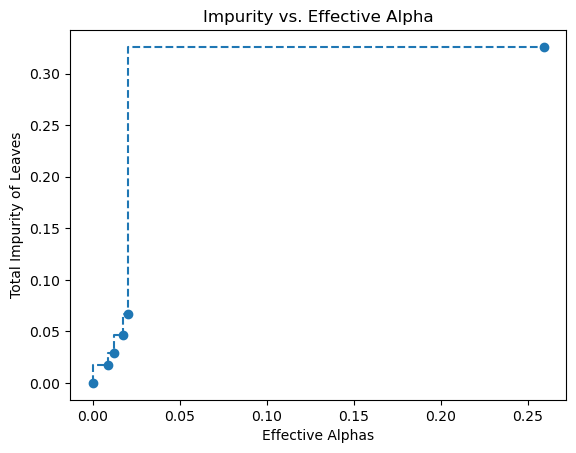

In [9]:
plt.step(ccp_alphas[:-1], impurities[:-1], '--o')
plt.title('Impurity vs. Effective Alpha')
plt.xlabel('Effective Alphas')
plt.ylabel('Total Impurity of Leaves');

### Problem 3

#### How the Nodes change with alpha

Now, loop over the `ccp_alphas` and build a `DecisionTreeClassifier` with `random_state = 42` and `ccp_alpha = i` where `i` is the given alpha.  Keep track of the fit tree node count using the `.tree_.node_count` attribute in the list `nodes`. What happens to the number of nodes as you increase alpha?

In [13]:
nodes = []
for i in ccp_alphas[:-1]:
    #create decision tree and fit it
    dtree1 = DecisionTreeClassifier(random_state=42, ccp_alpha = i).fit(X_train, y_train)
    
    #append node count to nodes
    nodes.append(dtree1.tree_.node_count)
nodes

[15, 11, 9, 7, 5, 3]

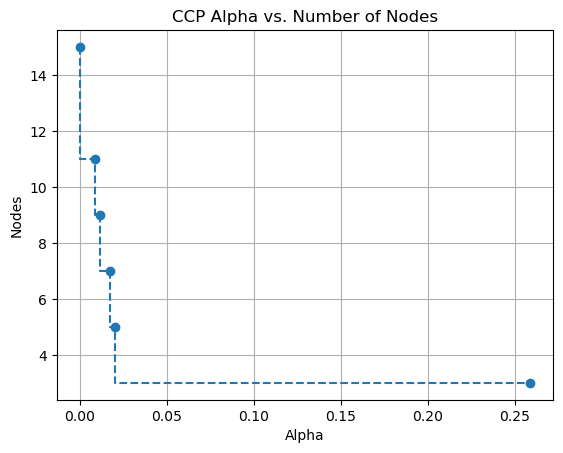

In [14]:
plt.step(ccp_alphas[:-1], nodes, '--o')
plt.xlabel('Alpha')
plt.ylabel('Nodes')
plt.title('CCP Alpha vs. Number of Nodes')
plt.grid();

### Problem 4

#### Depth of tree as alpha increases

Repeat the above exercise this time extracting and tracking the depth of the tree using the `.get_depth()` method.  Uncomment the code to visualize the relationship.  

In [15]:
depths = []
for i in ccp_alphas:
    dtree2 = DecisionTreeClassifier(random_state=42, ccp_alpha = i).fit(X_train, y_train)
    depths.append(dtree2.get_depth())
depths

[5, 4, 3, 3, 2, 1, 0]

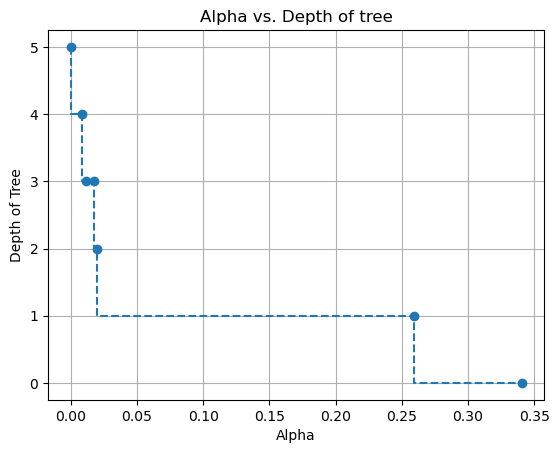

In [16]:
plt.step(ccp_alphas, depths, '--o')
plt.ylabel('Depth of Tree')
plt.xlabel('Alpha')
plt.grid()
plt.title('Alpha vs. Depth of tree');

### Problem 5

#### Scoring the trees

Finally, loop over the `ccp_alphas` building a tree for each and recording its training and testing accuracy to `train_accs` and `test_accs` below.  What `ccp_alpha` value resulted in the highest accuracy on the test data?  Uncomment the code to view the plot of the results.

In [20]:
train_accs = []
test_accs = []
for i in ccp_alphas[:-1]:
    dtree3 = DecisionTreeClassifier(random_state = 42, ccp_alpha = i).fit(X_train, y_train)
    train_accs.append(dtree3.score(X_train,y_train))
    test_accs.append(dtree3.score(X_test,y_test))
print(train_accs)
test_accs

[1.0, 0.9910714285714286, 0.9821428571428571, 0.9732142857142857, 0.9642857142857143, 0.6785714285714286]


[0.9210526315789473,
 0.9210526315789473,
 0.9210526315789473,
 0.9736842105263158,
 0.9473684210526315,
 0.631578947368421]

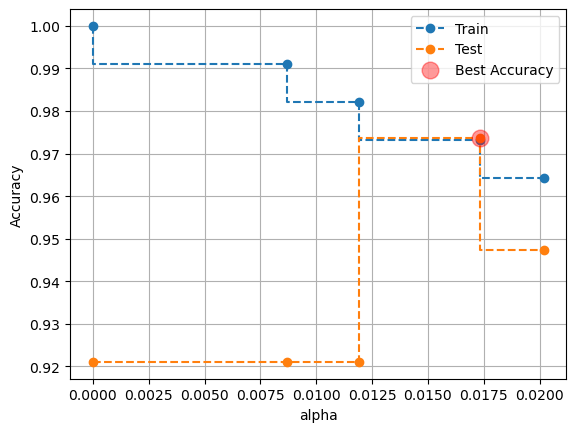

In [21]:
plt.step(ccp_alphas[:-2], train_accs[:-1], '--o', label = 'Train')
plt.step(ccp_alphas[:-2], test_accs[:-1], '--o', label = 'Test')
plt.plot(ccp_alphas[np.argmax(test_accs)], max(test_accs), 'ro', markersize = 12, alpha = 0.4, label = 'Best Accuracy')
plt.legend()
plt.grid()
plt.xlabel('alpha')
plt.ylabel('Accuracy');

For more examples of using Cost Complexity Pruning in scikitlearn see the example documentation [here](https://scikit-learn.org/stable/auto_examples/tree/plot_cost_complexity_pruning.html), and for more details on how the algorithm determines where to prune and how to compute alpha see [here](http://mlwiki.org/index.php/Cost-Complexity_Pruning).  

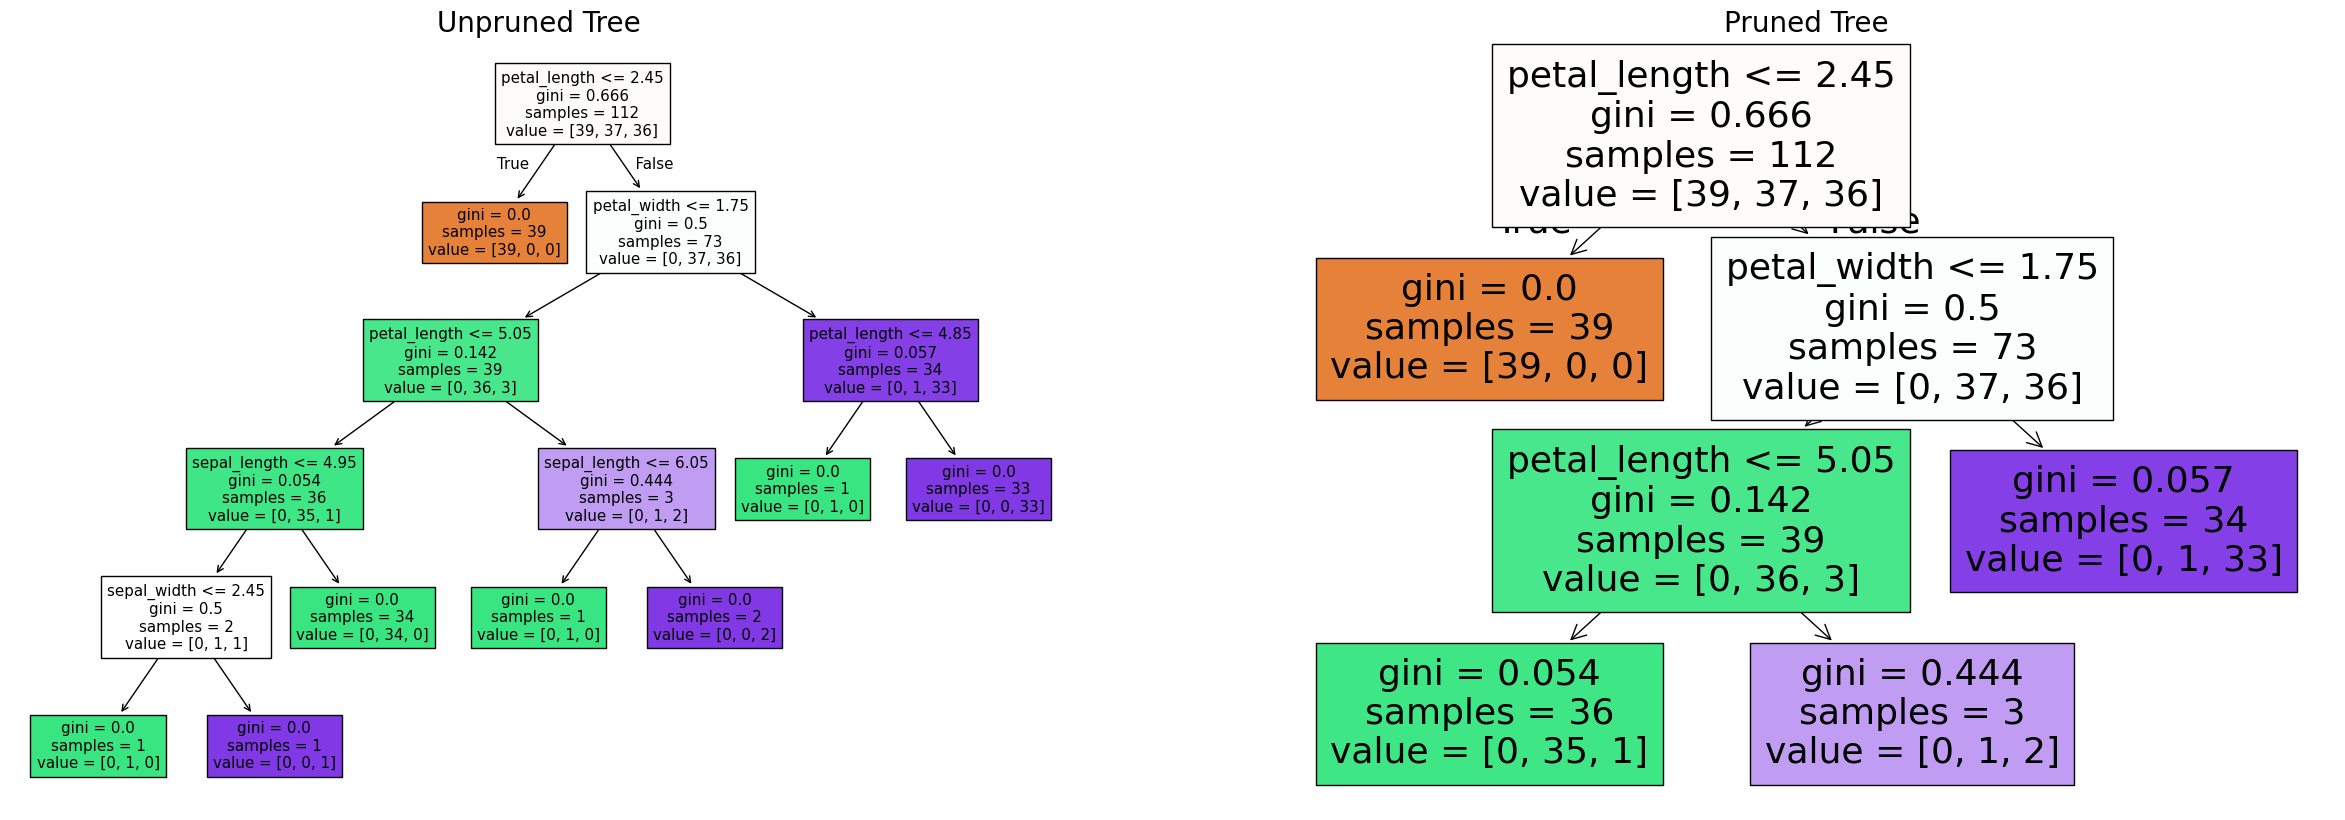

In [22]:
fig, ax = plt.subplots(1,2, figsize = (30, 10))
plot_tree(DecisionTreeClassifier(random_state=42).fit(X_train, y_train), ax = ax[0], filled = True, feature_names=X.columns);
ax[0].set_title('Unpruned Tree', fontsize = 20)
plot_tree(DecisionTreeClassifier(random_state = 42, ccp_alpha=ccp_alphas[np.argmax(test_accs)]).fit(X_train, y_train), filled = True, feature_names = X.columns);
ax[1].set_title('Pruned Tree', fontsize = 20);